In [92]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

In [39]:
nba = pd.read_csv('AllStarNBA')
nba_2016=pd.read_csv('NBA_2016')

In [40]:
nba_2015= nba[nba.season_end == 2015]
nbaHistoric= nba[nba.season_end <= 2014]

In [41]:
nbaHistoric2= nba[nba.season_end <= 2015]

In [126]:
nba_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 472
Data columns (total 51 columns):
Unnamed: 0      473 non-null int64
season          473 non-null int64
player          473 non-null object
pos             473 non-null object
age             473 non-null int64
bref_team_id    473 non-null object
g               473 non-null int64
gs              473 non-null int64
mp              473 non-null float64
fg              473 non-null float64
fga             473 non-null float64
fg_             473 non-null float64
x3p             473 non-null float64
x3pa            473 non-null float64
x3p_            473 non-null float64
x2p             473 non-null float64
x2pa            473 non-null float64
x2p_            473 non-null float64
efg             473 non-null float64
ft              473 non-null float64
fta             473 non-null float64
ft_             473 non-null float64
orb             473 non-null float64
drb             473 non-null float64
trb             473 

In [42]:
d = nbaHistoric
d.info()

d_2015 = nba_2015
d_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10965 entries, 0 to 10964
Data columns (total 53 columns):
Unnamed: 0      10965 non-null int64
player          10965 non-null object
pos             10965 non-null object
age             10965 non-null int64
bref_team_id    10965 non-null object
g               10965 non-null int64
gs              10965 non-null int64
mp              10965 non-null float64
fg              10965 non-null float64
fga             10965 non-null float64
fg_             10965 non-null float64
x3p             10965 non-null float64
x3pa            10965 non-null float64
x3p_            10965 non-null float64
x2p             10965 non-null float64
x2pa            10965 non-null float64
x2p_            10965 non-null float64
efg             10965 non-null float64
ft              10965 non-null float64
fta             10965 non-null float64
ft_             10965 non-null float64
orb             10965 non-null float64
drb             10965 non-null float64
trb  

In [43]:
col_u = ["g","gs","mp","fg","fga","fg_","x3p","x3pa","x3p_","x2p","x2pa","x2p_","ft","fta","ft_","orb","drb","trb","ast","stl","blk","tov","pf","pts"]

In [44]:
features= d[col_u]
features_2015 = d_2015[col_u]


In [45]:
label= np.where(d.team != 'None',1,0)
#label = d.team 


In [46]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1)
train = pd.DataFrame(data=features_train, columns=[col_u ])
train['team'] = label_train
test = pd.DataFrame(data=features_test,columns=[col_u ])
test['team'] = label_test


In [47]:
logReg = LogisticRegression()
logReg.fit(features_train,label_train)
B1 = logReg.coef_[0][0] # still confused why you use [0][0]
B0 = logReg.intercept_[0]
np.exp(B1) 


0.92218600518507898

In [48]:
logReg.score(features_test, label_test)# .977


0.97750759878419458

In [15]:
preds = logReg.predict(features_test)

In [51]:
label_test.mean()
1 - label_test.mean() #.974...what does this mean? What accuracy do I get if i say that everyoen didnt make the team


0.97477203647416411

In [52]:
test['pred_class'] = logReg.predict(features_test)


In [53]:
test_nd = test[test.team ==0 ]
specificity = sum(test_nd.pred_class == test_nd.team) / float(len(test_nd.team))


In [54]:
test_d = test[test.team == 1]
sensitivity = sum(test_d.pred_class == test_d.team) / float(len(test_d.team))


# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()

clf.fit(features_train,label_train)

clf.predict(features_test)

print "Accuracy =", clf.score(features_test, label_test)*100,"%"


 Accuracy = 87.811550152 %


# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=40)

clf = clf.fit(features_train, label_train)

pred = clf.predict(features_test)

print "accuracy =", clf.score(features_test, label_test) * 100, '%'

accuracy = 97.5987841945 %


# SVM

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='rbf', C=10000)

clf = clf.fit(features_train, label_train)

pred = clf.predict(features_test)

print "accuracy =", clf.score(features_test, label_test) * 100, '%'

accuracy = 98.085106383 %


In [66]:
col_a = ["FTr","BLK%","TS%","STL%","AST%","3PAr","USG%",'DBPM','OBPM','BPM','PER','DWS','OWS','WS','WS/48','TOV%','TRB%']


In [67]:
features= d[col_a]
features_2015= d_2015[col_a]
#y = d.team

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1)
train = pd.DataFrame(data=features_train, columns=[col_a ])
train['team'] = label_train
test = pd.DataFrame(data=features_test,columns=[col_a ])
test['team'] = label_test
logReg = LogisticRegression()
logReg.fit(features_train,label_train)
B1 = logReg.coef_[0][0] # still confused why you use [0][0]
B0 = logReg.intercept_[0]
np.exp(B1) #.44



1.6530451275681486

In [68]:
preds = logReg.predict(features_test)


In [69]:
test['pred_class'] = logReg.predict(test[col_a ])


In [70]:
logReg.score(features_test, label_test)# .978


0.97872340425531912

In [71]:
test_nd = test[test.team ==0 ]
specificity = sum(test_nd.pred_class == test_nd.team) / float(len(test_nd.team))


In [73]:
test_d = test[test.team == 1]
sensitivity = sum(test_d.pred_class == test_d.team) / float(len(test_d.team))


# Naive Bayes

In [74]:
clf.fit(features_train,label_train)

clf.predict(features_test)

print "Accuracy =", clf.score(features_test, label_test)*100,"%"


Accuracy = 98.4802431611 %


# Decision Tree

In [75]:

clf = DecisionTreeClassifier(min_samples_split=40)

clf = clf.fit(features_train, label_train)

pred = clf.predict(features_test)

print "accuracy =", clf.score(features_test, label_test) * 100, '%'

accuracy = 97.5075987842 %


# SVM

In [78]:
clf = SVC(kernel='rbf', C=10000)

clf = clf.fit(features_train, label_train)

pred = clf.predict(features_test)

print "accuracy =", clf.score(features_test, label_test) * 100, '%'

accuracy = 98.4802431611 %


In [34]:
col_c= ["g","mp","fg_","ft_","orb","drb","ast","stl","blk","tov","pts",'DBPM','OBPM','PER','DWS','WS','WS/48','AST%']


In [79]:
features= d[col_c]
features_2015 = d_2015[col_c]
#d.team= np.where(d.team != 'None',1,0)

#y = d.team

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1)
train = pd.DataFrame(data=features_train, columns=[col_c ])
train['team'] = label_train
test = pd.DataFrame(data=features_test,columns=[col_c ])
test['team'] = label_test


logReg = LogisticRegression()
logReg.fit(train[col_c ],label_train)
B1 = logReg.coef_[0][0] # still confused why you use [0][0]
B0 = logReg.intercept_[0]
np.exp(B1) #.961


0.95902426913007888

In [82]:
test['pred_class'] = logReg.predict(test[col_c ])
logReg.score(features_test, label_test)# .975


0.97933130699088144

In [83]:
test_nd = test[test.team ==0 ]
specificity = sum(test_nd.pred_class == test_nd.team) / float(len(test_nd.team))


In [84]:
test_d = test[test.team == 1]
sensitivity = sum(test_d.pred_class == test_d.team) / float(len(test_d.team))


In [101]:
d_2015['pred2015'] = logReg.predict(d_2015[col_c])
d_2015['probs2015'] = logReg.predict_proba(d_2015[col_c])[:, 1]
df =d_2015[['player','team','pred2015','probs2015']]
#null = 1 - sum(d.team) / float(len(d.team))


C:\Users\mahesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mahesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
test['pred_class'] = logReg.predict(test[col_c ])


In [88]:
from nltk import ConfusionMatrix
print ConfusionMatrix(list(label_test), list(preds))


  |    0    1 |
--+-----------+
0 |<3191>  16 |
1 |   54  <29>|
--+-----------+
(row = reference; col = test)



In [90]:
probs = logReg.predict_proba(features_test)[:, 1]


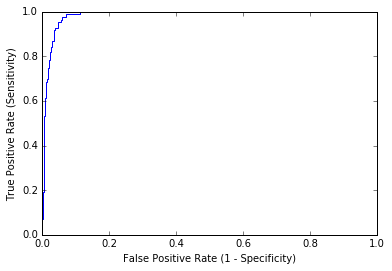

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(label_test, probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


In [94]:
print metrics.roc_auc_score(label_test, probs) #is this good?


0.985615051412


In [111]:
from sklearn.cross_validation import cross_val_score

X = nbaHistoric[col_c]
y = nbaHistoric.team
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

ValueError: multiclass format is not supported

# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(features_train, label_train)
d_2015['treepred']= treeclf.predict(d_2015[col_c])
trpred = treeclf.predict(features_test)

print "Accuracy =", accuracy_score(trpred, label_test)*100,"%"


Accuracy = 97.9635258359 %


C:\Users\mahesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(features_train, label_train)
# used sample weight to address Unbalanced classification using RandomForestClassifier in sklearn but can lead to bias
#pd.DataFrame({'feature':features_test, 'importance':rfclf.feature_importances_})

rfclf.oob_score_

pred = rfclf.predict(features_test)

print "Accuracy =", accuracy_score(pred, label_test)*100,"%"

d_2015['rfprd']=rfclf.predict_proba(d_2015[col_c])[:, 1]
d_2015['rfprd_predic']=rfclf.predict(d_2015[col_c])
    
df = d_2015[['player','team','treepred','rfprd_predic','pred2015', 'probs2015' ]]


C:\Users\mahesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mahesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Accuracy = 98.7841945289 %


In [125]:
df.sort_values(by='probs2015', ascending = False)

,player,team,treepred,rfprd_predic,pred2015,probs2015
11163,James Harden,1.0,1,1,1,0.916099
11437,Russell Westbrook,2.0,0,1,1,0.871988
11077,Stephen Curry,1.0,1,1,1,0.789654
11201,LeBron James,1.0,1,1,1,0.762401
11202,LeBron James,1.0,1,1,1,0.762401
11328,Chris Paul,2.0,1,1,1,0.682191
11104,Kevin Durant,None,0,0,1,0.505360
11156,Blake Griffin,3.0,0,0,0,0.470358
11155,Blake Griffin,3.0,0,0,0,0.470358
11082,Anthony Davis,1.0,0,0,0,0.422155
